### SVD used for channel correlation measurement

To checks correlation between materials we can use the SVD (Singular Value Decomposition):

$$ A = U \Sigma V^T $$

When SVD is applied to image data, it provides an alternative representation of the image embedding useful properties. One such property is revealed by **the singular values $ \Sigma $**, which contain information about the importance of each dimension corresponding to the eigenvectors used in the decomposition. In highly correlated images, singular values exhibit a rapid exponential decay. The 'Random-Access Neural Compression of Material Textures' paper shows that this decay pattern can be exploited by neural networks to learn compact representations that effectively compress image data.

### The cross channel correlation experiment
The experiment that checks cross-channel correlation between material inputs that has been noted in the 2023's paper "Random-Access Neural Compression of Material Textures".

I've used 10 "randomly" picked materials from freepbr.com to reproduce the results:
* [limestone-cliffs](https://freepbr.com/product/limestone-cliffs/)
* [worn-rusted-painted-pbr](https://freepbr.com/product/worn-rusted-painted-pbr/)
* [hungarian-point-flooring-pbr](https://freepbr.com/product/hungarian-point-flooring-pbr/)
* [oily-tubework-pbr](https://freepbr.com/product/oily-tubework-pbr/)
* [wispy-grass-meadow](https://freepbr.com/product/wispy-grass-meadow/)
* [soft-blanket-pbr](https://freepbr.com/product/soft-blanket-pbr/)
* [vines-pbr](https://freepbr.com/product/vines-pbr/)
* [alien-carnivorous-plant](https://freepbr.com/product/alien-carnivorous-plant/)
* [red-plaid-pbr](https://freepbr.com/product/red-plaid-pbr/)
* [water-inflatable](https://freepbr.com/product/water-inflatable/)

Which I extracted to *materials* folder:

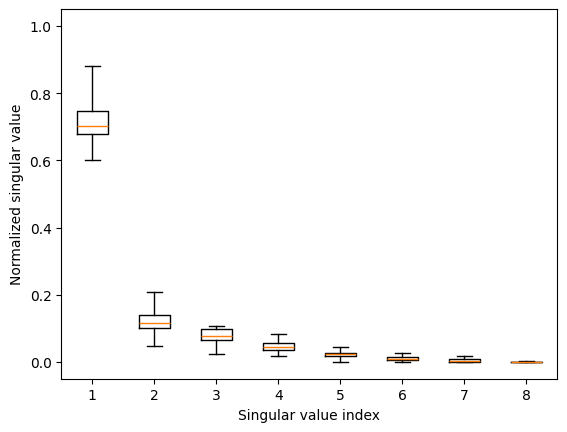

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

material_dir = 'materials'
channels = ['albedo', 'normal', 'metallic', 'roughness']
material_folders = [f for f in os.listdir(material_dir) if os.path.isdir(os.path.join(material_dir, f))]

def load_material(folder_path):
    all_entries = os.listdir(folder_path)
    material = None
    
    for channel in channels:
        file_name = [f for f in all_entries if channel in f][0]
        data = plt.imread(os.path.join(folder_path, file_name))
        data = data[:,:,:1] if channel in ['metallic', 'roughness'] else data[:,:,:3]
        material = data if material is None else np.concat([material, data], axis=-1)
    
    return material.reshape(-1, material.shape[-1])

normalized_singular_value_list = []
for folder in material_folders:
    
    material = load_material(os.path.join(material_dir, folder))
    U, S, Vt = np.linalg.svd(material, full_matrices=False)
    S_norm =  S / np.sum(S, axis=0)
    normalized_singular_value_list.append(S_norm)

plt.boxplot(np.stack(normalized_singular_value_list), whis=[0, 100])
plt.xlabel('Singular value index')
plt.ylabel('Normalized singular value')
_ = plt.ylim(-0.05, 1.05)

References:
* [Random-Access Neural Compression of Material Textures (2023)](https://arxiv.org/abs/2306.14978)